Question 2:
---

In [2]:
import numpy

In [11]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[9][9] = self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 + self.w/4.0
        
        PU[99][99] = self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0 + self.w/4.0           
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        reward = [0]*100
        reward[99] = 1.0
        self.reward = reward
        

print(Environment(w =0.1,disc = 0.8).PU[96])


[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.925  0.
  0.     0.     0.     0.     0.     0.     0.     0.025  0.025  0.025  0.
  0.   ]


In [12]:
import math
# optimal function
def value_iteration(env):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     
    
V = value_iteration(Environment(w =0.1,disc = 0.8)) 
print(V)

[[0.042231579022686871, 0.062847288048790723, 0.089742638168236841, 0.12384957134902652, 0.16708173136037749, 0.22188387920846833, 0.29135505474537265, 0.37942182824348603, 0.49106066474787258, 0.61333645197758524], [0.06284728804879075, 0.087870523467009687, 0.12155733275905017, 0.16451362320226293, 0.21924611647103606, 0.28898980106201738, 0.37787114862918963, 0.49106071431031201, 0.63322169297572428, 0.78743053925377682], [0.089742638168236882, 0.12155733275905013, 0.16438987012105116, 0.21913198413988258, 0.28890328207894361, 0.37782647670298181, 0.49115591609651349, 0.63549019317021738, 0.81735537159507055, 1.0185987641644325], [0.12384957134902652, 0.16451362320226293, 0.21913198413988258, 0.28889981025613454, 0.37782475827590978, 0.49115916166542284, 0.63560059601229169, 0.8196095054578445, 1.0521911343983477, 1.3150585831352666], [0.16708173136037749, 0.21924611647103601, 0.2889032820789435, 0.37782475827590978, 0.49115918040018874, 0.63560325015387731, 0.8196951140246056, 1.05

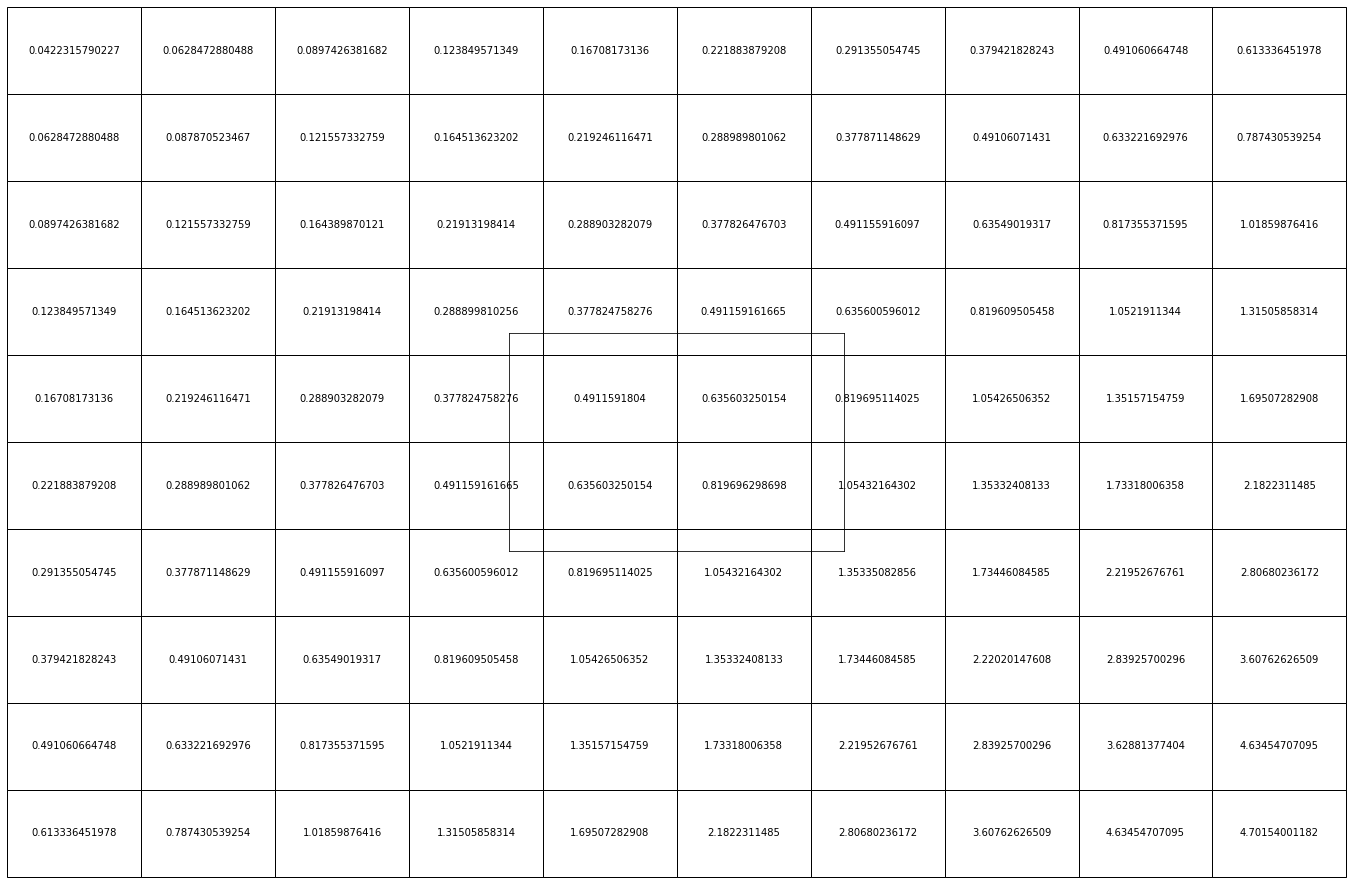

In [13]:
import numpy as np
import matplotlib.pyplot as pl

nx = 10
ny = 10


pl.figure()
tb = pl.table(cellText=V, loc=(0,0), cellLoc='center')

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(4/ny)
    cell.set_width(4/nx)

ax = pl.gca()
ax.set_xticks([])
ax.set_yticks([])
pl.show()